In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [2]:
WIN_FILEPATH = 'C:\\Users\\Admin\\Downloads\\samsung_HAR\\samsung_HAR\\'

In [3]:
X_train = np.loadtxt(WIN_FILEPATH+"samsung_train.txt")
y_train = np.loadtxt(WIN_FILEPATH+"samsung_train_labels.txt").astype(int)

X_test = np.loadtxt(WIN_FILEPATH+"samsung_test.txt")
y_test = np.loadtxt(WIN_FILEPATH+"samsung_test_labels.txt").astype(int)

In [4]:
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

In [5]:
len(np.concatenate((X_train, X_test),axis=0))

10299

In [6]:
len(X_train)+len(X_test)

10299

In [7]:
X = np.concatenate((X_train, X_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)

In [8]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [9]:
n_classes = np.unique(y).size

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

## 1,2

In [11]:
for x in [56,63,64,65,66,193]:
    pca = PCA(n_components=x)#, random_state=RANDOM_STATE)
    X_pca = pca.fit(X_scaled).transform(X_scaled)
    print(x,round(sum(pca.explained_variance_ratio_),4),round(pca.explained_variance_ratio_[0],2))

(56, 0.8837, 0.51)
(63, 0.897, 0.51)
(64, 0.8987, 0.51)
(65, 0.9005, 0.51)
(66, 0.9022, 0.51)
(193, 0.9922, 0.51)


In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit(X_scaled).transform(X_scaled)
data_x = [x[0] for x in X_pca]
data_y = [x[1] for x in X_pca]

# 3

Эти метки соответствуют:

1 - ходьбе

2 - подъему вверх по лестнице

3 - спуску по лестнице

4 - сидению

5 - стоянию

6 - лежанию

C:\Users\Admin\Anaconda2\envs\gl-env\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'DejaVu Sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


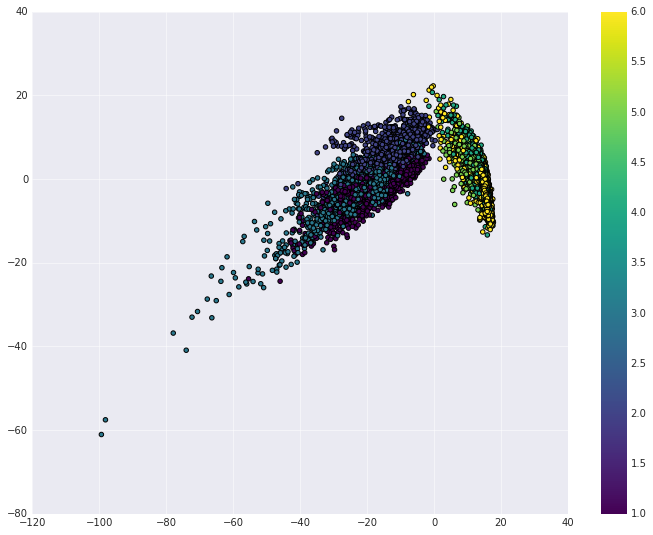

In [13]:
plt.scatter(data_x, data_y,c=y, s=20, cmap='viridis');
plt.colorbar()

Явно видны два кластера

# 4

In [14]:
cluster = KMeans(n_clusters=n_classes, n_init=100, random_state=RANDOM_STATE)

In [15]:
X_clustered = cluster.fit(X_pca).transform(X_pca)

In [16]:
X_clustered

array([[  7.35123502,  26.47442221,  42.22716771,   2.37673327,
         32.66486519,  61.32297102],
       [  6.23117114,  25.44843006,  41.47879441,   3.03391816,
         31.80617227,  60.71837836],
       [  7.07002101,  25.66862061,  41.25943764,   1.97609645,
         31.73518134,  60.33531883],
       ..., 
       [ 24.04100746,   5.04258239,  15.85572328,  28.43029755,
          5.00838138,  36.59459312],
       [ 20.39604887,   2.79195218,  19.53134718,  25.25215109,
          8.6880955 ,  40.2388006 ],
       [ 21.49769849,   3.29355981,  18.3630854 ,  26.1650184 ,
          7.51638009,  39.07725437]])

In [17]:
predicted = cluster.predict(X_pca)

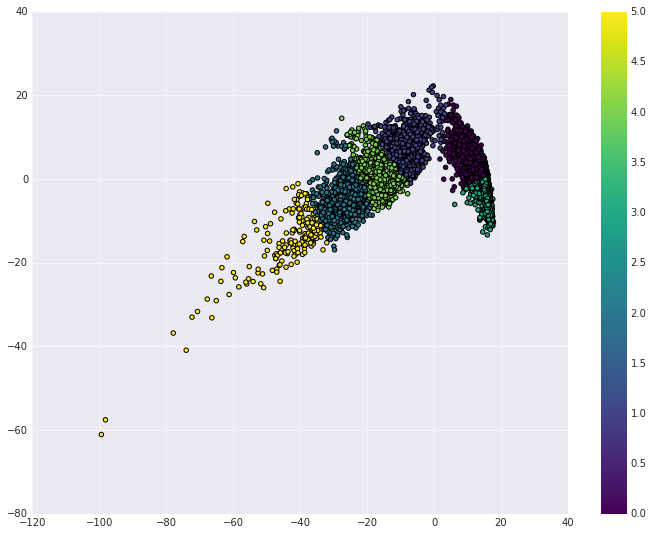

In [18]:
plt.scatter(data_x, data_y,c=predicted, s=20, cmap='viridis');
plt.colorbar()

In [19]:
tab = pd.crosstab(y, predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,0,435,405,0,844,38,1722
подъем вверх по лестнице,0,1013,114,0,415,2,1544
спуск по лестнице,0,162,581,0,501,162,1406
сидение,645,15,0,1117,0,0,1777
стояние,932,2,0,972,0,0,1906
лежание,552,26,0,1366,0,0,1944
все,2129,1653,1100,3455,1760,202,10299


In [20]:
answers = []
for pos,ser in tab.iterrows():
    answers.append(round(ser.max()/float(ser.sum()),10))
tab['answer'] = answers
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все,answer
ходьба,0,435,405,0,844,38,1722,0.5
подъем вверх по лестнице,0,1013,114,0,415,2,1544,0.5
спуск по лестнице,0,162,581,0,501,162,1406,0.5
сидение,645,15,0,1117,0,0,1777,0.5
стояние,932,2,0,972,0,0,1906,0.5
лежание,552,26,0,1366,0,0,1944,0.5
все,2129,1653,1100,3455,1760,202,10299,0.5


In [21]:
tab['answer'].sort_values(ascending=False)

все                         0.5
лежание                     0.5
стояние                     0.5
сидение                     0.5
спуск по лестнице           0.5
подъем вверх по лестнице    0.5
ходьба                      0.5
Name: answer, dtype: float64

Все отделились хреново

# 5

In [22]:
inertia = []
for k in tqdm_notebook(range(1, n_classes + 1)):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

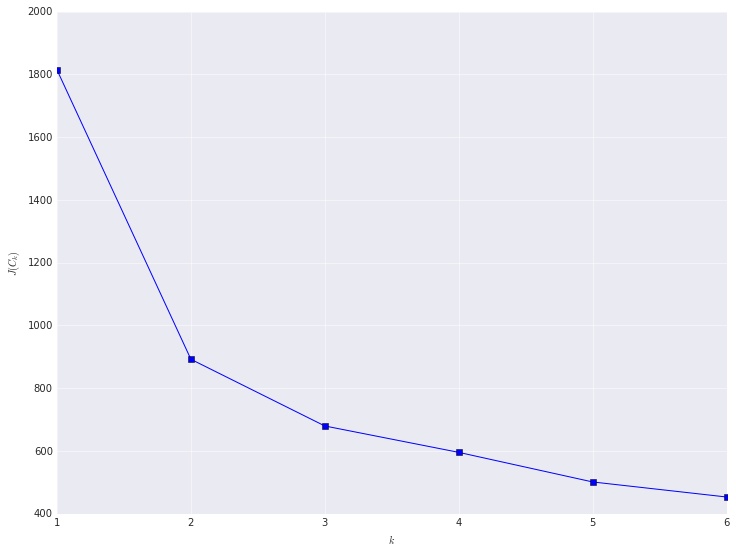

In [23]:
plt.plot(range(1, n_classes + 1), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Кажется, что 3. Хрен его поймёт

In [48]:
inertia

[1814.3885621503878,
 892.30376202522871,
 679.82549372459641,
 595.7481090038973,
 501.45125352317871,
 453.52612677075217]

In [56]:
def D(x, k):
    return x[k],k+1,(x[k]-x[k+1])/(x[k-1]-x[k])

In [57]:
for k in range(1,5):
    print(D(inertia,k))

(892.30376202522871, 2, 0.23043245943517515)
(679.82549372459641, 3, 0.39569874789142812)
(595.7481090038973, 4, 1.1215483901404408)
(501.45125352317871, 5, 0.50823674350653247)


Выходит, что таки 2 или 3

# 6

In [24]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward')

In [25]:
ag

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=6, n_components=None,
            pooling_func=<function mean at 0x000000000446B4A8>)

In [26]:
predicted_agglomerative = ag.fit_predict(X_pca)

In [27]:
predicted_agglomerative

array([0, 0, 4, ..., 2, 2, 2], dtype=int64)

In [28]:
metrics.adjusted_rand_score(y,predicted)

0.2740310242497162

In [29]:
metrics.adjusted_rand_score(y,predicted_agglomerative)

0.2625750496345055

#### ARI выражает сходство меток, и чем больше значение этого индекса, тем лучше

KMeans справился с кластеризацией хуже, чем Agglomerative Clustering

#### Для ARI не имеет значения, какие именно метки присвоены кластерам

#### В случае случайного разбиения на кластеры ARI ~0

# 7

In [30]:
from sklearn.cross_validation import StratifiedKFold
from sklearn import grid_search

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [33]:
skf = StratifiedKFold(y_train, n_folds=3, shuffle=True, random_state=17)
best_svc = grid_search.GridSearchCV(svc, svc_params, n_jobs=-1, verbose=1, scoring='accuracy', cv=skf)
best_svc.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   37.5s finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[5 5 ..., 2 2], n_folds=3, shuffle=True, random_state=17),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=17, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [34]:
best_svc.best_params_

{'C': 0.1}

In [35]:
best_svc.best_score_

0.9851741022850925

# 8

In [36]:
y_predicted = best_svc.predict(X_test_scaled)

In [37]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
               'сидение', 'стояние', 'лежание', 'все']
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все
ходьба,494,2,0,0,0,0,496
подъем вверх по лестнице,12,459,0,0,0,0,471
спуск по лестнице,2,4,412,1,1,0,420
сидение,0,4,0,427,60,0,491
стояние,0,0,0,15,517,0,532
лежание,0,0,0,0,11,526,537
все,508,469,412,443,589,526,2947


In [38]:
answers = []
for pos,ser in tab.iterrows():
    answers.append(tab.loc[pos,pos]!=ser.sum())
tab['путает'] = answers
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все,путает
ходьба,494,2,0,0,0,0,496,True
подъем вверх по лестнице,12,459,0,0,0,0,471,True
спуск по лестнице,2,4,412,1,1,0,420,True
сидение,0,4,0,427,60,0,491,True
стояние,0,0,0,15,517,0,532,True
лежание,0,0,0,0,11,526,537,True
все,508,469,412,443,589,526,2947,True


Путает и внутри групп, и внутри кластеров сидение-стояние-лежание и обратного.

# 9

In [39]:
for x in range(50,65):
    pca = PCA(n_components=x)
    X_pca = pca.fit(X_train_scaled).transform(X_train_scaled)
    print(x,round(sum(pca.explained_variance_ratio_),4),round(pca.explained_variance_ratio_[0],2))

(50, 0.8752, 0.51)
(51, 0.8774, 0.51)
(52, 0.8795, 0.51)
(53, 0.8816, 0.51)
(54, 0.8836, 0.51)
(55, 0.8856, 0.51)
(56, 0.8876, 0.51)
(57, 0.8895, 0.51)
(58, 0.8914, 0.51)
(59, 0.8933, 0.51)
(60, 0.8952, 0.51)
(61, 0.897, 0.51)
(62, 0.8988, 0.51)
(63, 0.9005, 0.51)
(64, 0.9023, 0.51)


In [40]:
pca = PCA(n_components=63)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [41]:
skf = StratifiedKFold(y_train, n_folds=3, shuffle=True, random_state=17)
best_pca_svc = grid_search.GridSearchCV(svc, svc_params, n_jobs=-1, verbose=1, scoring='accuracy', cv=skf)
best_pca_svc.fit(X_train_pca,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.9s finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[5 5 ..., 2 2], n_folds=3, shuffle=True, random_state=17),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=17, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [42]:
best_pca_svc.best_score_

0.94776931447225243

In [43]:
best_pca_svc.best_params_

{'C': 1}

In [45]:
y_predicted = best_pca_svc.predict(X_test_pca)

In [46]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
               'сидение', 'стояние', 'лежание', 'все']
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все
ходьба,472,16,7,0,0,1,496
подъем вверх по лестнице,47,407,17,0,0,0,471
спуск по лестнице,6,23,390,0,1,0,420
сидение,0,2,0,426,63,0,491
стояние,3,0,0,50,479,0,532
лежание,0,0,0,3,0,534,537
все,528,448,414,479,543,535,2947


#### Путает и внутри групп, и внутри кластеров сидение-стояние-лежание и обратного.

In [47]:
round(best_svc.best_score_ - best_pca_svc.best_score_, 2)*100

4.0

# 10


(4%) Метод главных компонент в данном случае позволил уменьшить время обучения модели, при этом качество пострадало более 10%

#### PCA можно использовать для визуализации данных, однако для этой задачи есть и лучше подходящие методы, но PCA имеет меньшую вычислительную сложность

#### PCA строит линейные комбинации исходных признаков, которые плохо интерпретируются человеком

(у них разные задачи) SVM работает лучше, чем kMeans, поскольку этот алгоритм явно сводится к задаче оптимизации